In [2]:
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
import torchvision
import torch.utils.data as data_utils
import numpy as np
import os

torch.manual_seed(1)

In [3]:
dataset_image_channels = 3

class Discriminator(nn.Module):
    def __init__(self, in_dim, hidden_dim):
        super(Discriminator, self).__init__()

        self.conv1 = nn.Conv2d(dataset_image_channels, 16, 4, 2, 1, bias=False)
        self.norm1 = nn.BatchNorm2d(16)
        self.relu1 = nn.LeakyReLU(0.2, inplace=True)

        # 16 x 14 x 14
        self.conv2 = nn.Conv2d(16, 32, 7, 2, 0, bias=False)
        self.norm2 = nn.BatchNorm2d(32)
        self.relu2 = nn.LeakyReLU(0.2, inplace=True)

        # 32 x 4 x 4
        self.conv3 = nn.Conv2d(32, 1, 4, 2, 0, bias=False)
        self.sigmoid = nn.Sigmoid()

        # Linear
        self.flatten = nn.Flatten()
        self.out = nn.Linear(32*4*4, 2)

    """
        self.network = nn.Sequential(
            # input 1 x 28 x 28
            nn.Conv2d(1, 16, 4, 2, 1, bias=False),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(0.2, inplace=True),

            # 16 x 14 x 14
            nn.Conv2d(16, 32, 7, 2, 3, bias=False),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2, inplace=True),

            # 32 x 7 x 7
            nn.Conv2d(32, 1, 4, 2, 0, bias=False),
            nn.Sigmoid()
        )
    """

    def forward(self, x):
        #print("Forward pass")
        #print(x.shape)
        x = self.conv1(x)
        x = self.norm1(x)
        x = self.relu1(x)

        #print(x.shape)
        x = self.conv2(x)
        x = self.norm2(x)
        x = self.relu2(x)
        # print(f'conv shape {x.shape}')
        #print(x.shape)

        # x = self.conv3(x)
        # print(f'conv shape {x.shape}')
        x = self.flatten(x)
        # print(f'flat shape {x.shape}')
        # x = self.sigmoid(x)
        return self.out(x)


kernel_size = 5  # <-- Kernel size
conv_stride = 1  # <-- Stride
conv_pad = 2  # <-- Padding
n_z = 20
ngf = 64


class Generator(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super(Generator, self).__init__()

        self.network = nn.Sequential(
            # in: 20

            nn.ConvTranspose2d(n_z, ngf * 2, 7, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # (ngf*2) x 7 x 7

            nn.ConvTranspose2d(ngf * 2, ngf * 1, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # (ngf) x 14 x 14

            nn.ConvTranspose2d(ngf, dataset_image_channels, 4, 2, 1),
            nn.BatchNorm2d(dataset_image_channels),
            nn.ReLU(True),
        )

    def forward(self, x):
        return self.network(x)


model_G = Generator(28 * 28, 256, 28 * 28)
model_D = Discriminator(28 * 28, 256)

In [4]:
'''optimizer_G = optim.RMSprop(model_G.parameters(), lr=0.002)
optimizer_D = optim.RMSprop(model_D.parameters(), lr=0.002)'''
# Use the Adam optimizer for the generator
optimizer_G = torch.optim.RMSprop(model_G.parameters(), lr=0.005)

# Use the RMSprop optimizer for the discriminator
optimizer_D = torch.optim.RMSprop(model_D.parameters(), lr=0.001)

In [5]:
batch_size = 8

training_data = torchvision.datasets.CIFAR10(
    root="CIFAR10/",
    train=True,
    download=True,
    transform= torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                               torchvision.transforms.Resize((28, 28))
                                               ])

)
data_loader = torch.utils.data.DataLoader(training_data, batch_size)

Files already downloaded and verified


Loss G: tensor(4.7272, grad_fn=<NegBackward0>) Loss D: tensor(0.4309, grad_fn=<AddBackward0>)


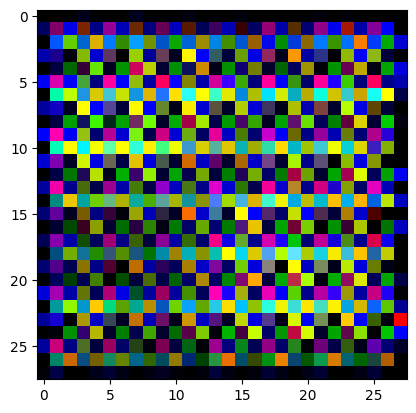

[1/3][0/50000]	Loss_D: 0.4309	Loss_G: 4.7272
[1/3][800/50000]	Loss_D: -11.3727	Loss_G: 1.9077
[1/3][1600/50000]	Loss_D: -12.4624	Loss_G: 1.8239
[1/3][2400/50000]	Loss_D: -12.3428	Loss_G: 0.5967
[1/3][3200/50000]	Loss_D: -12.2655	Loss_G: 1.2409
Loss G: tensor(-1.2182, grad_fn=<NegBackward0>) Loss D: tensor(-14.3700, grad_fn=<AddBackward0>)


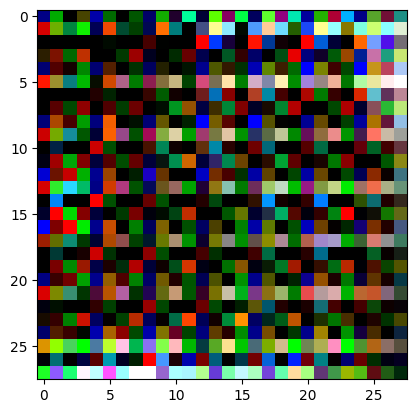

[1/3][4000/50000]	Loss_D: -14.3700	Loss_G: -1.2182
[1/3][4800/50000]	Loss_D: -9.5834	Loss_G: -3.8026
[1/3][5600/50000]	Loss_D: 1.3180	Loss_G: -5.5244
[1/3][6400/50000]	Loss_D: 0.5638	Loss_G: -2.8480
[1/3][7200/50000]	Loss_D: 0.4218	Loss_G: -2.8986
Loss G: tensor(-2.9915, grad_fn=<NegBackward0>) Loss D: tensor(0.3101, grad_fn=<AddBackward0>)


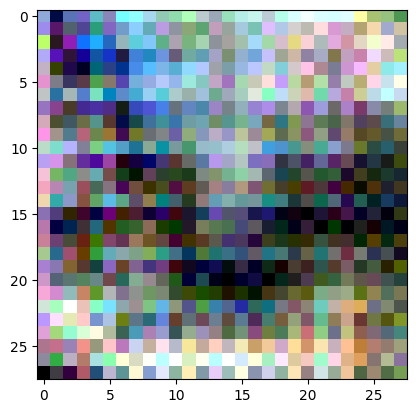

[1/3][8000/50000]	Loss_D: 0.3101	Loss_G: -2.9915
[1/3][8800/50000]	Loss_D: 0.0760	Loss_G: -1.9736
[1/3][9600/50000]	Loss_D: -0.0286	Loss_G: -1.9787
[1/3][10400/50000]	Loss_D: 0.1176	Loss_G: -1.4663
[1/3][11200/50000]	Loss_D: 0.3577	Loss_G: -1.8537
Loss G: tensor(-1.3101, grad_fn=<NegBackward0>) Loss D: tensor(-0.0728, grad_fn=<AddBackward0>)


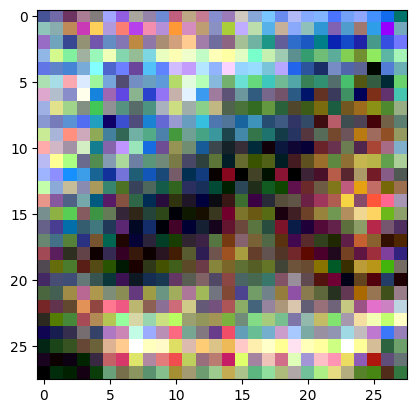

[1/3][12000/50000]	Loss_D: -0.0728	Loss_G: -1.3101
[1/3][12800/50000]	Loss_D: 0.0945	Loss_G: -1.0051
[1/3][13600/50000]	Loss_D: -0.0525	Loss_G: -1.5220
[1/3][14400/50000]	Loss_D: 0.0861	Loss_G: -0.8565
[1/3][15200/50000]	Loss_D: 0.0974	Loss_G: -1.0394
Loss G: tensor(-0.9493, grad_fn=<NegBackward0>) Loss D: tensor(0.0559, grad_fn=<AddBackward0>)


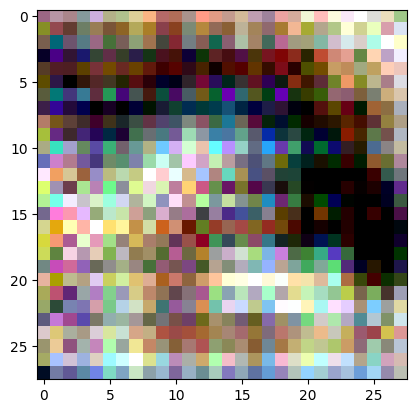

[1/3][16000/50000]	Loss_D: 0.0559	Loss_G: -0.9493
[1/3][16800/50000]	Loss_D: -0.0629	Loss_G: -0.7531
[1/3][17600/50000]	Loss_D: 0.0942	Loss_G: -0.6922
[1/3][18400/50000]	Loss_D: -0.0644	Loss_G: -0.4588
[1/3][19200/50000]	Loss_D: 0.0457	Loss_G: -0.7959
Loss G: tensor(-0.5201, grad_fn=<NegBackward0>) Loss D: tensor(-0.0637, grad_fn=<AddBackward0>)


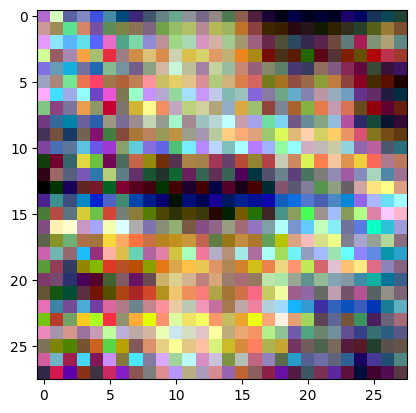

[1/3][20000/50000]	Loss_D: -0.0637	Loss_G: -0.5201
[1/3][20800/50000]	Loss_D: 0.0526	Loss_G: -0.6149
[1/3][21600/50000]	Loss_D: 0.1569	Loss_G: -0.0356
[1/3][22400/50000]	Loss_D: 0.0121	Loss_G: -0.2745
[1/3][23200/50000]	Loss_D: -0.0362	Loss_G: -0.2517
Loss G: tensor(-0.4257, grad_fn=<NegBackward0>) Loss D: tensor(0.0112, grad_fn=<AddBackward0>)


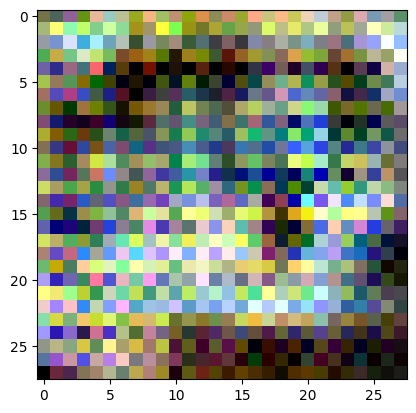

[1/3][24000/50000]	Loss_D: 0.0112	Loss_G: -0.4257
[1/3][24800/50000]	Loss_D: 0.1228	Loss_G: -0.1523
[1/3][25600/50000]	Loss_D: -0.0333	Loss_G: -0.2423
[1/3][26400/50000]	Loss_D: -0.0758	Loss_G: -0.3125
[1/3][27200/50000]	Loss_D: -0.0296	Loss_G: -0.2582
Loss G: tensor(-0.4531, grad_fn=<NegBackward0>) Loss D: tensor(-0.0100, grad_fn=<AddBackward0>)


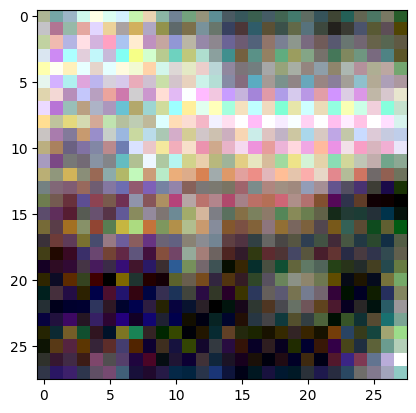

[1/3][28000/50000]	Loss_D: -0.0100	Loss_G: -0.4531
[1/3][28800/50000]	Loss_D: 0.0160	Loss_G: -0.0254
[1/3][29600/50000]	Loss_D: 0.0671	Loss_G: -0.0786
[1/3][30400/50000]	Loss_D: 0.0443	Loss_G: -0.1216
[1/3][31200/50000]	Loss_D: -0.0246	Loss_G: 0.0548
Loss G: tensor(0.2060, grad_fn=<NegBackward0>) Loss D: tensor(-0.1014, grad_fn=<AddBackward0>)


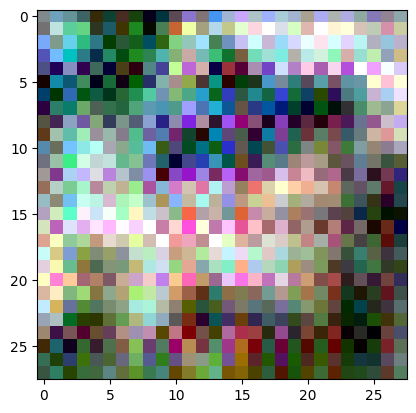

[1/3][32000/50000]	Loss_D: -0.1014	Loss_G: 0.2060
[1/3][32800/50000]	Loss_D: 0.0091	Loss_G: -0.1705
[1/3][33600/50000]	Loss_D: 0.0352	Loss_G: -0.2033
[1/3][34400/50000]	Loss_D: -0.0072	Loss_G: -0.2214
[1/3][35200/50000]	Loss_D: 0.0575	Loss_G: -0.0897
Loss G: tensor(-0.1605, grad_fn=<NegBackward0>) Loss D: tensor(0.0322, grad_fn=<AddBackward0>)


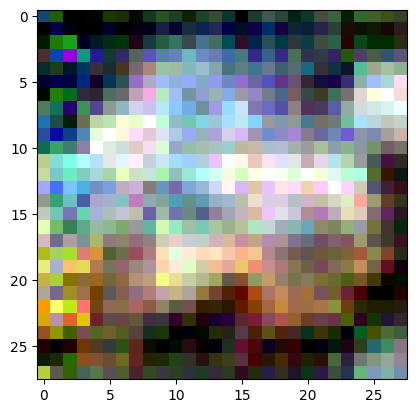

[1/3][36000/50000]	Loss_D: 0.0322	Loss_G: -0.1605
[1/3][36800/50000]	Loss_D: 0.0592	Loss_G: -0.1986
[1/3][37600/50000]	Loss_D: -0.0001	Loss_G: 0.0124
[1/3][38400/50000]	Loss_D: -0.0037	Loss_G: -0.1617
[1/3][39200/50000]	Loss_D: -0.0181	Loss_G: -0.0100
Loss G: tensor(0.2408, grad_fn=<NegBackward0>) Loss D: tensor(-0.0512, grad_fn=<AddBackward0>)


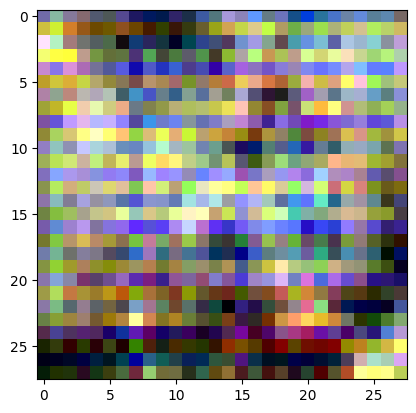

[1/3][40000/50000]	Loss_D: -0.0512	Loss_G: 0.2408
[1/3][40800/50000]	Loss_D: -0.0106	Loss_G: -0.1174
[1/3][41600/50000]	Loss_D: 0.0538	Loss_G: -0.0664
[1/3][42400/50000]	Loss_D: -0.0130	Loss_G: -0.0694
[1/3][43200/50000]	Loss_D: 0.0483	Loss_G: -0.3086
Loss G: tensor(-0.1606, grad_fn=<NegBackward0>) Loss D: tensor(-0.0104, grad_fn=<AddBackward0>)


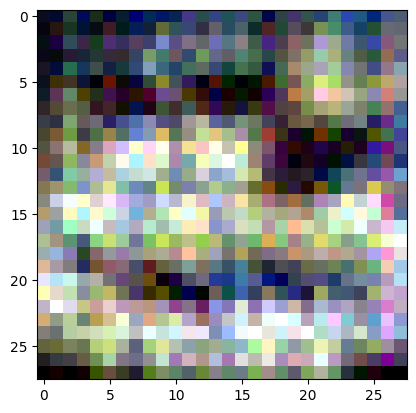

[1/3][44000/50000]	Loss_D: -0.0104	Loss_G: -0.1606
[1/3][44800/50000]	Loss_D: 0.0204	Loss_G: -0.2863
[1/3][45600/50000]	Loss_D: 0.0199	Loss_G: 0.0574
[1/3][46400/50000]	Loss_D: -0.0233	Loss_G: -0.1159
[1/3][47200/50000]	Loss_D: 0.1000	Loss_G: -0.0349
Loss G: tensor(-0.2669, grad_fn=<NegBackward0>) Loss D: tensor(0.0480, grad_fn=<AddBackward0>)


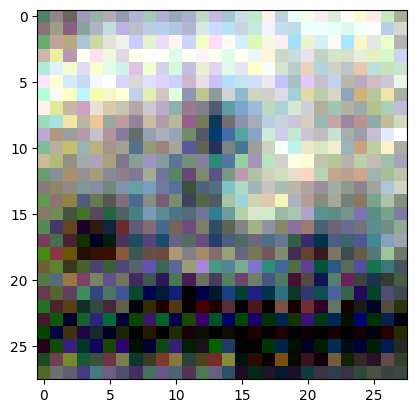

[1/3][48000/50000]	Loss_D: 0.0480	Loss_G: -0.2669
[1/3][48800/50000]	Loss_D: 0.0563	Loss_G: -0.0418
[1/3][49600/50000]	Loss_D: 0.0607	Loss_G: -0.3621
Loss G: tensor(-0.0936, grad_fn=<NegBackward0>) Loss D: tensor(0.0046, grad_fn=<AddBackward0>)


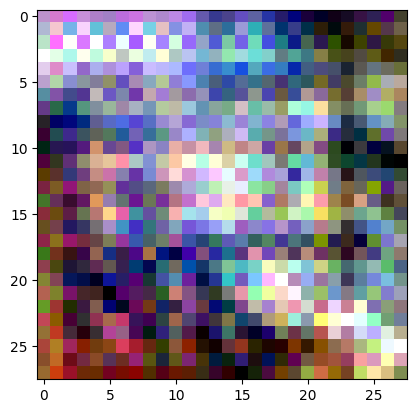

[2/3][0/50000]	Loss_D: 0.0046	Loss_G: -0.0936
[2/3][800/50000]	Loss_D: 0.0312	Loss_G: -0.2117
[2/3][1600/50000]	Loss_D: -0.0083	Loss_G: -0.1183
[2/3][2400/50000]	Loss_D: -0.0329	Loss_G: -0.0167
[2/3][3200/50000]	Loss_D: -0.0193	Loss_G: -0.1265
Loss G: tensor(-0.2793, grad_fn=<NegBackward0>) Loss D: tensor(0.0265, grad_fn=<AddBackward0>)


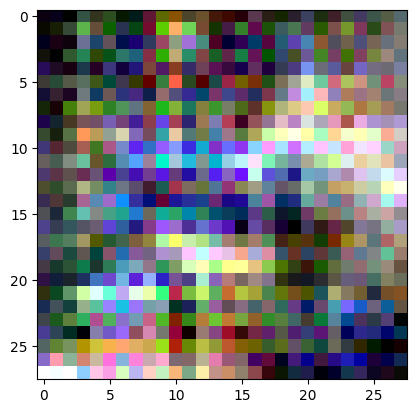

[2/3][4000/50000]	Loss_D: 0.0265	Loss_G: -0.2793
[2/3][4800/50000]	Loss_D: -0.0435	Loss_G: -0.1381
[2/3][5600/50000]	Loss_D: 0.0144	Loss_G: -0.0623
[2/3][6400/50000]	Loss_D: 0.0359	Loss_G: -0.0710
[2/3][7200/50000]	Loss_D: 0.0097	Loss_G: 0.0067
Loss G: tensor(-0.0189, grad_fn=<NegBackward0>) Loss D: tensor(0.0235, grad_fn=<AddBackward0>)


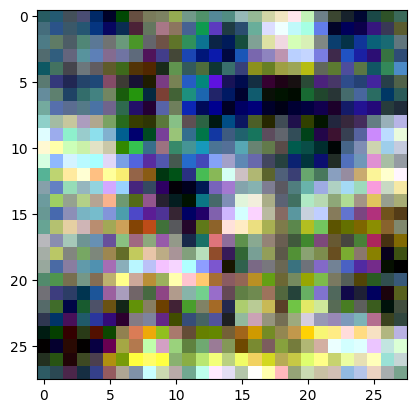

[2/3][8000/50000]	Loss_D: 0.0235	Loss_G: -0.0189
[2/3][8800/50000]	Loss_D: 0.0021	Loss_G: 0.0264
[2/3][9600/50000]	Loss_D: -0.0219	Loss_G: -0.0572
[2/3][10400/50000]	Loss_D: 0.0234	Loss_G: -0.1414
[2/3][11200/50000]	Loss_D: 0.0573	Loss_G: -0.0174
Loss G: tensor(-0.2861, grad_fn=<NegBackward0>) Loss D: tensor(0.0076, grad_fn=<AddBackward0>)


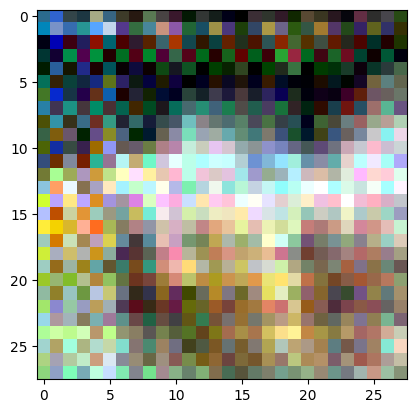

[2/3][12000/50000]	Loss_D: 0.0076	Loss_G: -0.2861
[2/3][12800/50000]	Loss_D: -0.0292	Loss_G: 0.0519
[2/3][13600/50000]	Loss_D: -0.0036	Loss_G: -0.1032
[2/3][14400/50000]	Loss_D: 0.0303	Loss_G: -0.2679
[2/3][15200/50000]	Loss_D: -0.0003	Loss_G: -0.2083
Loss G: tensor(-0.0140, grad_fn=<NegBackward0>) Loss D: tensor(0.0283, grad_fn=<AddBackward0>)


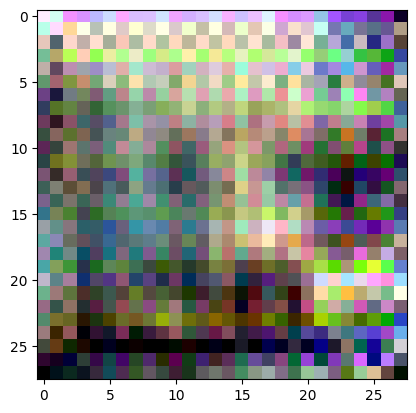

[2/3][16000/50000]	Loss_D: 0.0283	Loss_G: -0.0140
[2/3][16800/50000]	Loss_D: 0.0137	Loss_G: 0.1313
[2/3][17600/50000]	Loss_D: 0.1497	Loss_G: -0.2516
[2/3][18400/50000]	Loss_D: -0.0630	Loss_G: 0.1602
[2/3][19200/50000]	Loss_D: -0.0281	Loss_G: 0.0333
Loss G: tensor(-0.0707, grad_fn=<NegBackward0>) Loss D: tensor(-0.0420, grad_fn=<AddBackward0>)


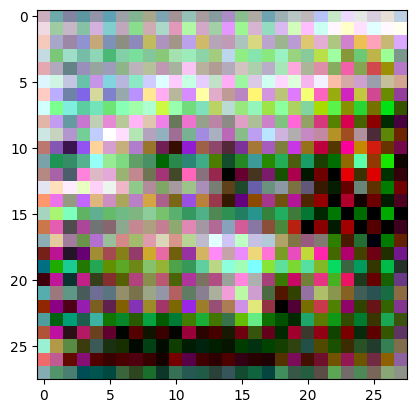

[2/3][20000/50000]	Loss_D: -0.0420	Loss_G: -0.0707
[2/3][20800/50000]	Loss_D: 0.0130	Loss_G: 0.1263
[2/3][21600/50000]	Loss_D: 0.0407	Loss_G: -0.2366
[2/3][22400/50000]	Loss_D: -0.0007	Loss_G: -0.1238
[2/3][23200/50000]	Loss_D: -0.0247	Loss_G: -0.0029
Loss G: tensor(-0.2063, grad_fn=<NegBackward0>) Loss D: tensor(0.2071, grad_fn=<AddBackward0>)


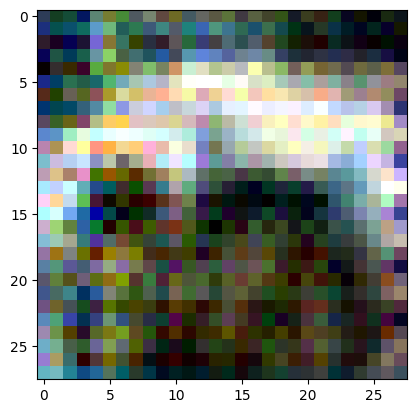

[2/3][24000/50000]	Loss_D: 0.2071	Loss_G: -0.2063
[2/3][24800/50000]	Loss_D: -0.1199	Loss_G: -0.0678
[2/3][25600/50000]	Loss_D: -0.0280	Loss_G: -0.1253
[2/3][26400/50000]	Loss_D: 0.1170	Loss_G: 0.0197
[2/3][27200/50000]	Loss_D: -0.0047	Loss_G: -0.0737
Loss G: tensor(-0.1327, grad_fn=<NegBackward0>) Loss D: tensor(0.0374, grad_fn=<AddBackward0>)


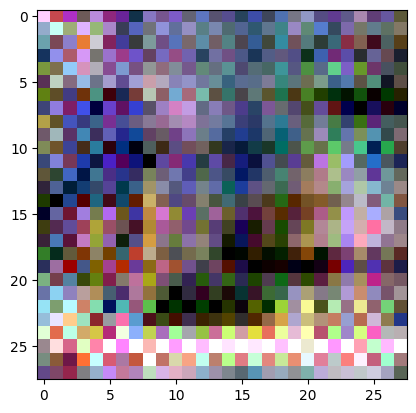

[2/3][28000/50000]	Loss_D: 0.0374	Loss_G: -0.1327
[2/3][28800/50000]	Loss_D: -0.0067	Loss_G: -0.2382
[2/3][29600/50000]	Loss_D: -0.0999	Loss_G: 0.1471
[2/3][30400/50000]	Loss_D: -0.0595	Loss_G: -0.0373
[2/3][31200/50000]	Loss_D: 0.1208	Loss_G: 0.0587
Loss G: tensor(-0.2990, grad_fn=<NegBackward0>) Loss D: tensor(0.0330, grad_fn=<AddBackward0>)


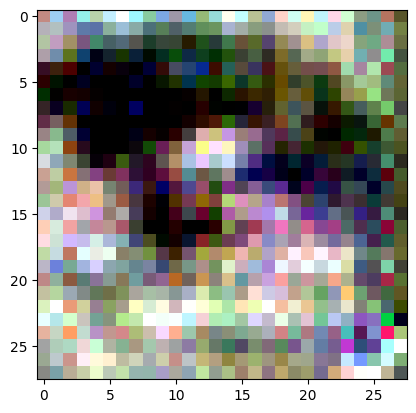

[2/3][32000/50000]	Loss_D: 0.0330	Loss_G: -0.2990
[2/3][32800/50000]	Loss_D: -0.0530	Loss_G: 0.0011
[2/3][33600/50000]	Loss_D: 0.0558	Loss_G: 0.0449
[2/3][34400/50000]	Loss_D: 0.0090	Loss_G: 0.0304
[2/3][35200/50000]	Loss_D: 0.0482	Loss_G: 0.0202
Loss G: tensor(-0.1933, grad_fn=<NegBackward0>) Loss D: tensor(0.0946, grad_fn=<AddBackward0>)


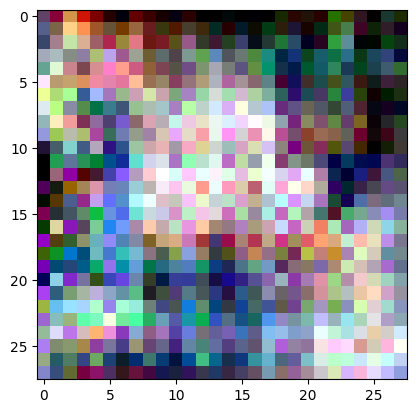

[2/3][36000/50000]	Loss_D: 0.0946	Loss_G: -0.1933
[2/3][36800/50000]	Loss_D: -0.0393	Loss_G: -0.2114
[2/3][37600/50000]	Loss_D: 0.0203	Loss_G: -0.3990
[2/3][38400/50000]	Loss_D: 0.0305	Loss_G: -0.4966
[2/3][39200/50000]	Loss_D: 0.1184	Loss_G: -0.4130
Loss G: tensor(-0.3354, grad_fn=<NegBackward0>) Loss D: tensor(0.1356, grad_fn=<AddBackward0>)


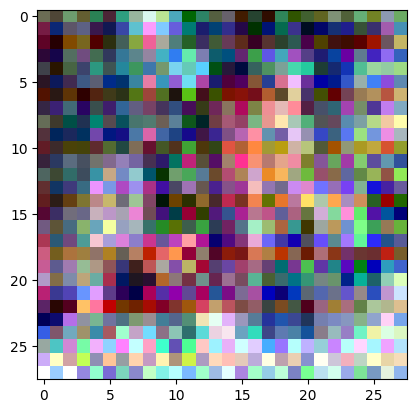

[2/3][40000/50000]	Loss_D: 0.1356	Loss_G: -0.3354
[2/3][40800/50000]	Loss_D: 0.0919	Loss_G: -0.1248
[2/3][41600/50000]	Loss_D: -0.0808	Loss_G: -0.0960
[2/3][42400/50000]	Loss_D: -0.0630	Loss_G: -0.0574
[2/3][43200/50000]	Loss_D: 0.0563	Loss_G: -0.0643
Loss G: tensor(-0.2519, grad_fn=<NegBackward0>) Loss D: tensor(0.0246, grad_fn=<AddBackward0>)


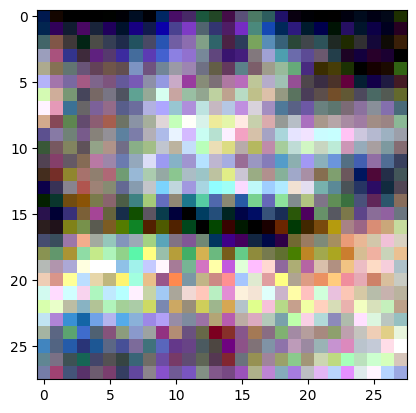

[2/3][44000/50000]	Loss_D: 0.0246	Loss_G: -0.2519
[2/3][44800/50000]	Loss_D: -0.0095	Loss_G: -0.2083
[2/3][45600/50000]	Loss_D: -0.0081	Loss_G: -0.2097
[2/3][46400/50000]	Loss_D: -0.0873	Loss_G: 0.0658
[2/3][47200/50000]	Loss_D: 0.0466	Loss_G: -0.0941
Loss G: tensor(-0.2467, grad_fn=<NegBackward0>) Loss D: tensor(0.0388, grad_fn=<AddBackward0>)


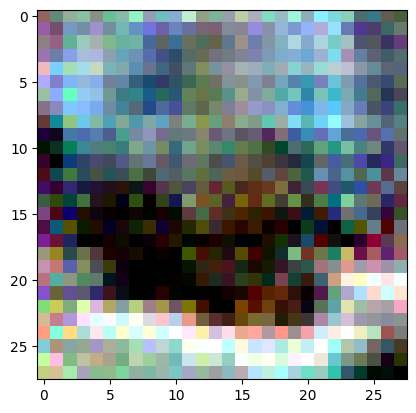

[2/3][48000/50000]	Loss_D: 0.0388	Loss_G: -0.2467
[2/3][48800/50000]	Loss_D: 0.0112	Loss_G: -0.0751
[2/3][49600/50000]	Loss_D: 0.0496	Loss_G: -0.2226
Loss G: tensor(-0.1522, grad_fn=<NegBackward0>) Loss D: tensor(0.0344, grad_fn=<AddBackward0>)


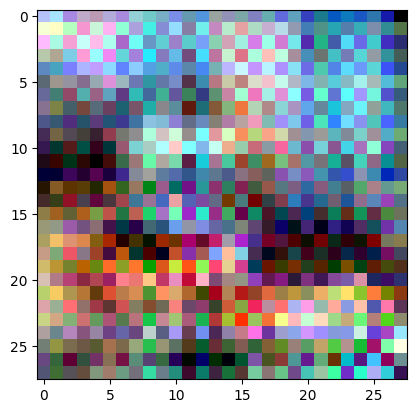

[3/3][0/50000]	Loss_D: 0.0344	Loss_G: -0.1522
[3/3][800/50000]	Loss_D: 0.0861	Loss_G: -0.2225
[3/3][1600/50000]	Loss_D: 0.0064	Loss_G: -0.0687
[3/3][2400/50000]	Loss_D: -0.0618	Loss_G: -0.0960
[3/3][3200/50000]	Loss_D: 0.0247	Loss_G: -0.1322
Loss G: tensor(-0.0346, grad_fn=<NegBackward0>) Loss D: tensor(-0.0002, grad_fn=<AddBackward0>)


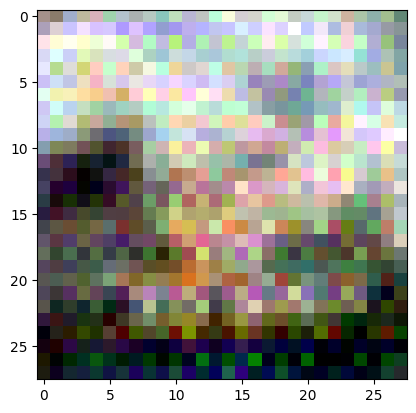

[3/3][4000/50000]	Loss_D: -0.0002	Loss_G: -0.0346
[3/3][4800/50000]	Loss_D: -0.0216	Loss_G: -0.0274
[3/3][5600/50000]	Loss_D: 0.0518	Loss_G: 0.0356
[3/3][6400/50000]	Loss_D: -0.0393	Loss_G: -0.0334
[3/3][7200/50000]	Loss_D: -0.0150	Loss_G: -0.0644
Loss G: tensor(-0.1643, grad_fn=<NegBackward0>) Loss D: tensor(0.0885, grad_fn=<AddBackward0>)


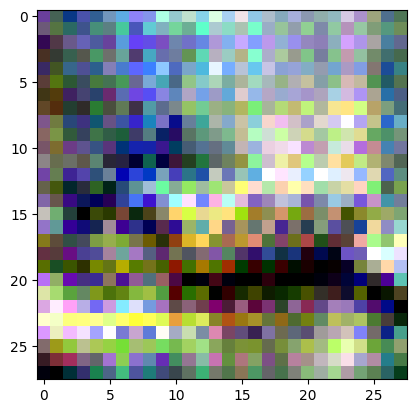

[3/3][8000/50000]	Loss_D: 0.0885	Loss_G: -0.1643
[3/3][8800/50000]	Loss_D: 0.0022	Loss_G: -0.0737
[3/3][9600/50000]	Loss_D: 0.0137	Loss_G: -0.2146
[3/3][10400/50000]	Loss_D: 0.0657	Loss_G: -0.1477
[3/3][11200/50000]	Loss_D: -0.0209	Loss_G: -0.1364
Loss G: tensor(-0.1224, grad_fn=<NegBackward0>) Loss D: tensor(0.0289, grad_fn=<AddBackward0>)


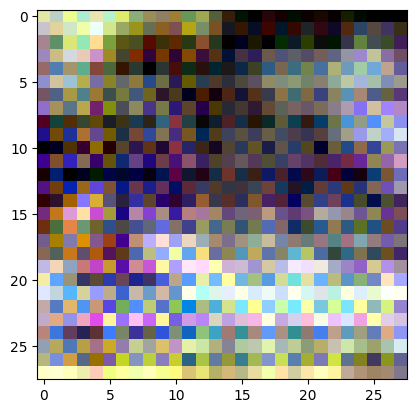

[3/3][12000/50000]	Loss_D: 0.0289	Loss_G: -0.1224
[3/3][12800/50000]	Loss_D: 0.0211	Loss_G: -0.1147
[3/3][13600/50000]	Loss_D: 0.0126	Loss_G: -0.2558
[3/3][14400/50000]	Loss_D: 0.0292	Loss_G: -0.0102
[3/3][15200/50000]	Loss_D: 0.0140	Loss_G: -0.0443
Loss G: tensor(-0.1527, grad_fn=<NegBackward0>) Loss D: tensor(0.0346, grad_fn=<AddBackward0>)


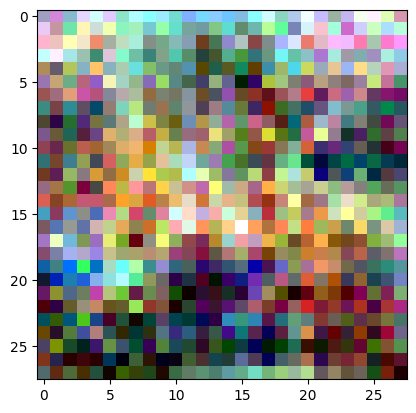

[3/3][16000/50000]	Loss_D: 0.0346	Loss_G: -0.1527
[3/3][16800/50000]	Loss_D: -0.0495	Loss_G: -0.0534
[3/3][17600/50000]	Loss_D: 0.0017	Loss_G: -0.2299
[3/3][18400/50000]	Loss_D: 0.0355	Loss_G: -0.1572
[3/3][19200/50000]	Loss_D: 0.0040	Loss_G: -0.0018
Loss G: tensor(-0.1143, grad_fn=<NegBackward0>) Loss D: tensor(0.0047, grad_fn=<AddBackward0>)


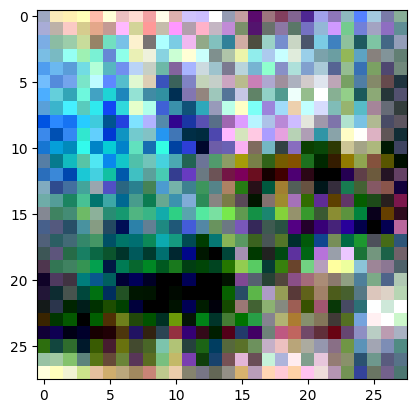

[3/3][20000/50000]	Loss_D: 0.0047	Loss_G: -0.1143
[3/3][20800/50000]	Loss_D: 0.0349	Loss_G: -0.0663
[3/3][21600/50000]	Loss_D: 0.0141	Loss_G: -0.1017
[3/3][22400/50000]	Loss_D: 0.0586	Loss_G: -0.1420
[3/3][23200/50000]	Loss_D: 0.0089	Loss_G: -0.1630
Loss G: tensor(-0.0620, grad_fn=<NegBackward0>) Loss D: tensor(0.0015, grad_fn=<AddBackward0>)


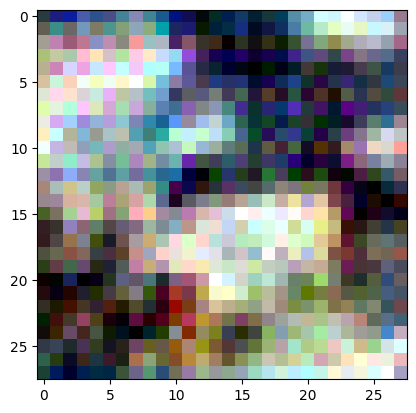

[3/3][24000/50000]	Loss_D: 0.0015	Loss_G: -0.0620
[3/3][24800/50000]	Loss_D: -0.0423	Loss_G: -0.0191
[3/3][25600/50000]	Loss_D: 0.0403	Loss_G: -0.1414
[3/3][26400/50000]	Loss_D: 0.0157	Loss_G: -0.2038
[3/3][27200/50000]	Loss_D: 0.0374	Loss_G: -0.1586
Loss G: tensor(-0.1144, grad_fn=<NegBackward0>) Loss D: tensor(-0.0006, grad_fn=<AddBackward0>)


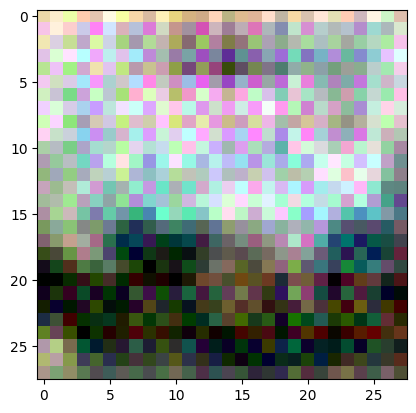

[3/3][28000/50000]	Loss_D: -0.0006	Loss_G: -0.1144
[3/3][28800/50000]	Loss_D: -0.0010	Loss_G: -0.1030
[3/3][29600/50000]	Loss_D: -0.0344	Loss_G: -0.0272
[3/3][30400/50000]	Loss_D: 0.0028	Loss_G: -0.1126
[3/3][31200/50000]	Loss_D: 0.0011	Loss_G: -0.2084
Loss G: tensor(-0.1999, grad_fn=<NegBackward0>) Loss D: tensor(0.0229, grad_fn=<AddBackward0>)


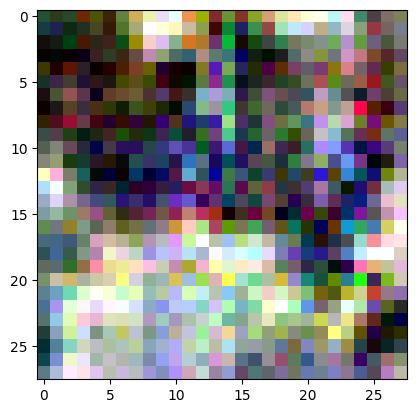

[3/3][32000/50000]	Loss_D: 0.0229	Loss_G: -0.1999
[3/3][32800/50000]	Loss_D: 0.0124	Loss_G: -0.1001
[3/3][33600/50000]	Loss_D: 0.0178	Loss_G: -0.1560
[3/3][34400/50000]	Loss_D: 0.0132	Loss_G: -0.1607
[3/3][35200/50000]	Loss_D: 0.0445	Loss_G: -0.1319
Loss G: tensor(-0.1295, grad_fn=<NegBackward0>) Loss D: tensor(0.0398, grad_fn=<AddBackward0>)


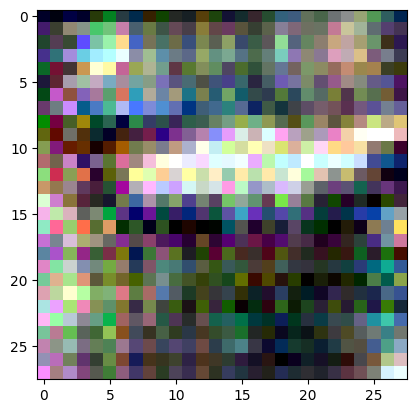

[3/3][36000/50000]	Loss_D: 0.0398	Loss_G: -0.1295
[3/3][36800/50000]	Loss_D: -0.0108	Loss_G: -0.0804
[3/3][37600/50000]	Loss_D: -0.0215	Loss_G: -0.1541
[3/3][38400/50000]	Loss_D: 0.0014	Loss_G: -0.2055
[3/3][39200/50000]	Loss_D: -0.0367	Loss_G: -0.0533
Loss G: tensor(-0.0984, grad_fn=<NegBackward0>) Loss D: tensor(-0.0246, grad_fn=<AddBackward0>)


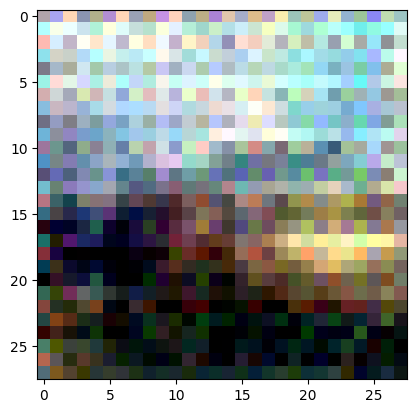

[3/3][40000/50000]	Loss_D: -0.0246	Loss_G: -0.0984
[3/3][40800/50000]	Loss_D: -0.0547	Loss_G: -0.1389
[3/3][41600/50000]	Loss_D: 0.0003	Loss_G: -0.1343
[3/3][42400/50000]	Loss_D: 0.0147	Loss_G: -0.1524
[3/3][43200/50000]	Loss_D: 0.0137	Loss_G: -0.0959
Loss G: tensor(-0.1270, grad_fn=<NegBackward0>) Loss D: tensor(-0.0202, grad_fn=<AddBackward0>)


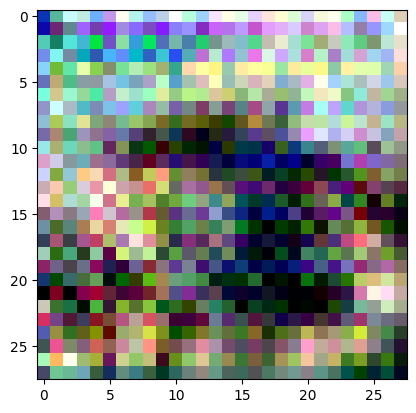

[3/3][44000/50000]	Loss_D: -0.0202	Loss_G: -0.1270
[3/3][44800/50000]	Loss_D: -0.0142	Loss_G: -0.0884
[3/3][45600/50000]	Loss_D: -0.0052	Loss_G: -0.1271
[3/3][46400/50000]	Loss_D: 0.0057	Loss_G: -0.1040
[3/3][47200/50000]	Loss_D: -0.0146	Loss_G: -0.1877
Loss G: tensor(-0.1625, grad_fn=<NegBackward0>) Loss D: tensor(0.0020, grad_fn=<AddBackward0>)


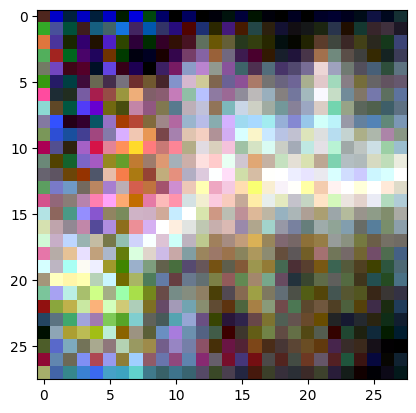

[3/3][48000/50000]	Loss_D: 0.0020	Loss_G: -0.1625
[3/3][48800/50000]	Loss_D: 0.0109	Loss_G: -0.1143
[3/3][49600/50000]	Loss_D: 0.0203	Loss_G: -0.0630


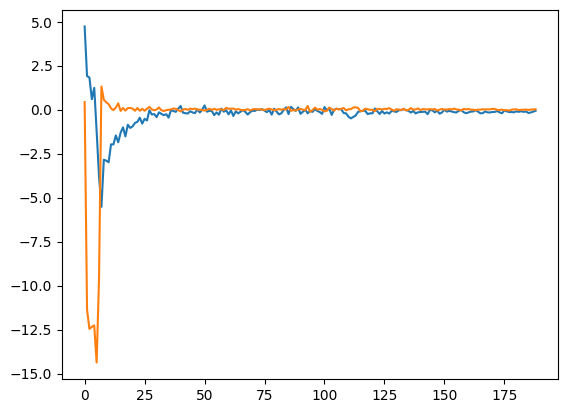

In [6]:
num_epochs = 3
real_label = 1
fake_label = 0

cum_data = {'d_loss': [], 'g_loss': [], 'fid_scores': [], 'generated_image': [], 'real_image': []}
for e in range(num_epochs):
    done = True

    for n, (real_samples, _) in enumerate(data_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn(batch_size, 20, 1, 1)

        # Zero gradients
        model_D.zero_grad()

        # Generate fake samples
        generated_samples = model_G(latent_space_samples)

        # TRAIN ON REAL SAMPLES
        # Real samples through Discriminator
        D_scores_on_real = model_D(real_samples).view(-1)

        # TRAIN ON FAKE SAMPLES
        D_scores_on_fake = model_D(generated_samples).view(-1)
        loss_d = -D_scores_on_real.mean() + D_scores_on_fake.mean()
        loss_d.backward(retain_graph=True)
        optimizer_D.step()

        # Update G network
        model_G.zero_grad()
        D_scores_on_fake2 = model_D(generated_samples).view(-1)
        loss_g = -D_scores_on_fake2.mean()
        loss_g.backward(retain_graph=True)
        optimizer_G.step()


        if n % 500 == 0:
            # Bookkeeping
            done = False
            '''loss_g = - D_scores_on_fake.mean()
            loss_d = D_scores_on_real.mean() - D_scores_on_fake.mean()'''
            print("Loss G:", loss_g, "Loss D:", loss_d)

            latent_space_samples = torch.randn((batch_size, 20, 1, 1))
            generated_samples = model_G(latent_space_samples)
            generated_samples = generated_samples.detach()
            generated_samples = generated_samples.permute([0, 2, 3, 1])
            generated_samples -= generated_samples.min(1, keepdim=True)[0]
            generated_samples /= generated_samples.max(1, keepdim=True)[0]
            plt.imshow(generated_samples[0])
            plt.show()
        if n % 100 == 0:
            '''loss_g = - D_scores_on_fake.mean()
            loss_d = D_scores_on_real.mean() - D_scores_on_fake.mean()'''

            cum_data['g_loss'].append(loss_g.detach())
            cum_data['d_loss'].append(loss_d.detach())
            cum_data['generated_image'].append(generated_samples)
            cum_data['real_image'].append(real_samples)
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f'
                  % (e+1, num_epochs, n*batch_size, len(training_data),
                     loss_d, loss_g))


plt.plot(cum_data['g_loss'])
plt.plot(cum_data['d_loss'])
plt.show()

torch.Size([1600, 3, 28, 28])


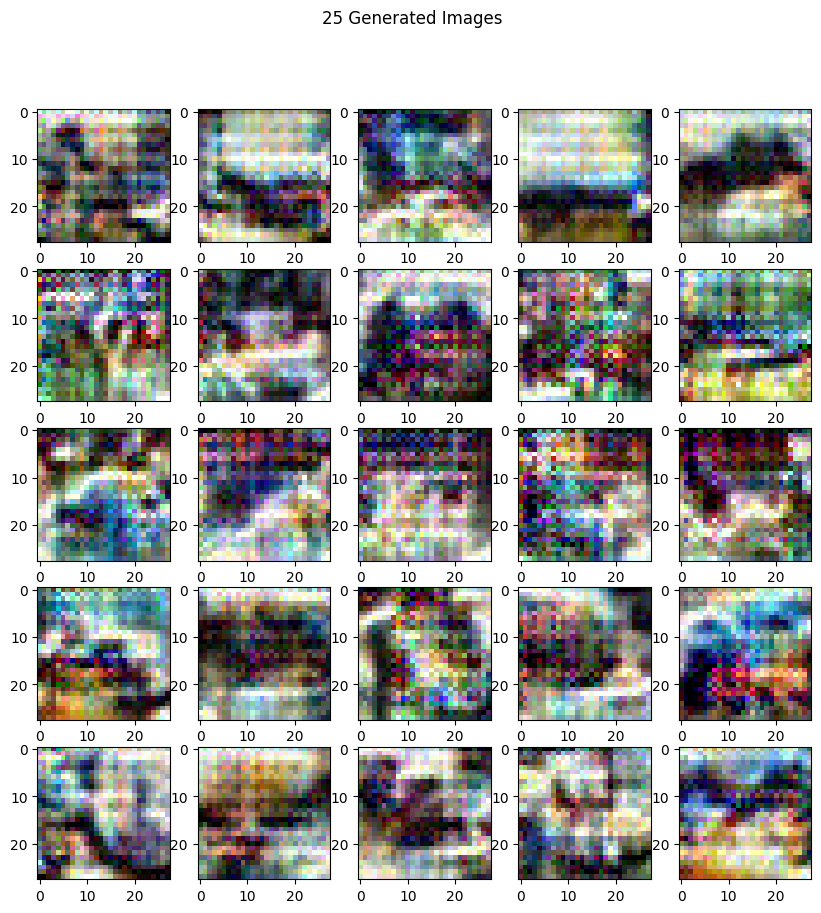

In [7]:
# Generate 25 Images

latent_space_samples = torch.randn((batch_size*200, 20, 1, 1))
generated_samples = model_G(latent_space_samples)
generated_samples = generated_samples.detach()
print(generated_samples.shape)
generated_samples = generated_samples.permute([0, 2, 3, 1])
generated_samples -= generated_samples.min(1, keepdim=True)[0]
generated_samples /= generated_samples.max(1, keepdim=True)[0]

fig, axs = plt.subplots(5, 5, figsize=(10,10))
fig.suptitle("25 Generated Images")
for x in range(5):
    for y in range(5):
        index = x*5 + y
        axs[x, y].imshow(generated_samples[index])

generated_samples = generated_samples.permute([0, 3, 1, 2])


In [8]:
for i in range(len(cum_data['generated_image'])):
    cum_data['generated_image'][i] = cum_data['generated_image'][i].detach()

In [9]:
target_dir_generated = "Generated/WGANSpecNormCIFAR10/"
target_dir_examples = "CIFAR10Examples/"

In [10]:
n_batches = 200

real = []
for n, (real_samples, _) in enumerate(data_loader):
    if n == n_batches:
        break
    real += [real_samples]
real = torch.cat(real, dim=0)

fake = []
for i in range(n_batches):
    fake_images = model_G(torch.randn((8, 20, 1, 1)))
    fake.append(fake_images)
fake = torch.cat(fake, dim=0)
print(fake.shape)

torch.Size([1600, 3, 28, 28])


In [11]:
# Save real images
for i in range(len(real)):
    filepath = os.path.join(target_dir_examples, f"Real_Image-{i}.png")
    torchvision.utils.save_image(real[i], filepath)

'''
for i in range(len(fake)):
    filepath = os.path.join(target_dir_generated, f"Fake_Image-{i}.png")
    #print(fake[i].shape)
    torchvision.utils.save_image(fake[i], filepath)
'''

for i in range(len(generated_samples)):
    filepath = os.path.join(target_dir_generated, f"Fake_Image-{i}.png")
    torchvision.utils.save_image(generated_samples[i], filepath)

print("fake done\nall done")


fake done
all done


In [12]:
print(max(fake[0][0][0]))

tensor(1.1393, grad_fn=<UnbindBackward0>)


TypeError: Invalid shape (3, 28, 28) for image data

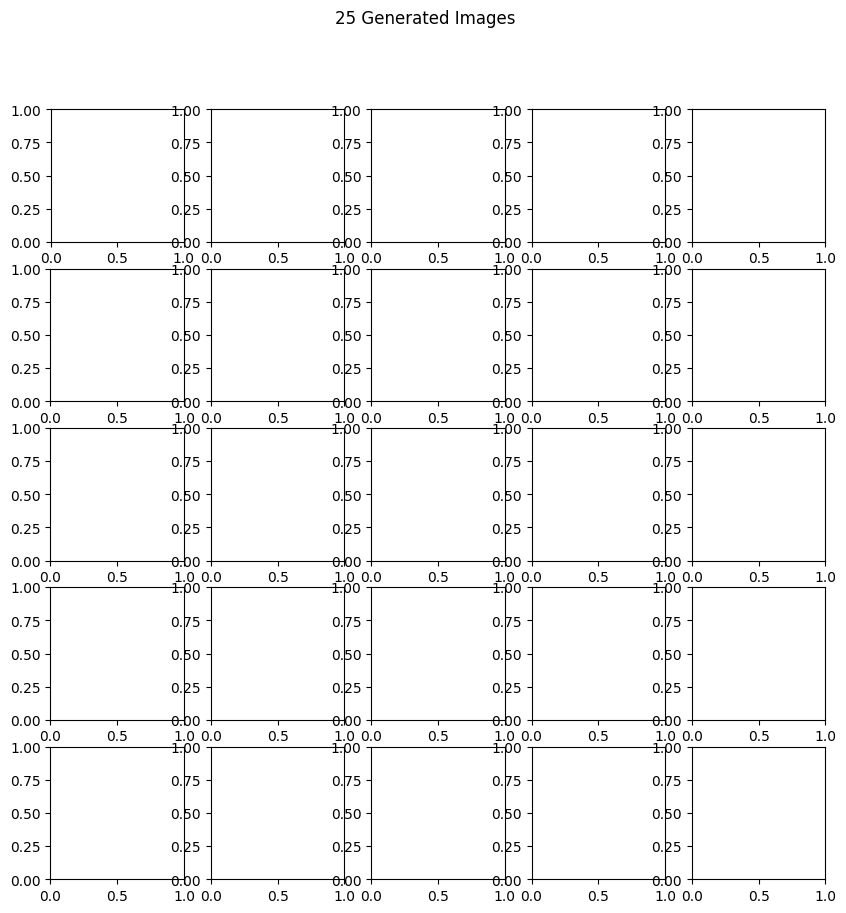

In [13]:
fig, axs = plt.subplots(5, 5, figsize=(10,10))
fig.suptitle("25 Generated Images")
for x in range(5):
    for y in range(5):
        index = x*5 + y
        axs[x, y].imshow(real[index])